# Task 3: Image Classification using Convolutional Neural Networks (CNN)

## Objective:
To build and train a **Convolutional Neural Network (CNN)** using TensorFlow for image classification, and evaluate the model’s performance on a test dataset.

This notebook includes:
- Dataset loading and preprocessing
- CNN architecture design and compilation
- Model training and validation
- Accuracy & loss evaluation


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 1600)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                102464    
_________________________________________________________________
dense_7 (Dense)              (None, 10)               

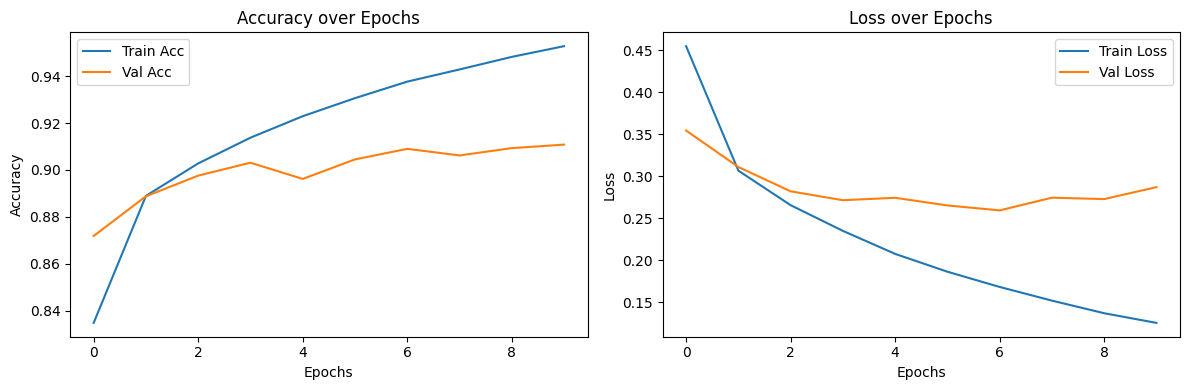

313/313 - 3s - loss: 0.2872 - accuracy: 0.9108
Test Accuracy: 0.9108


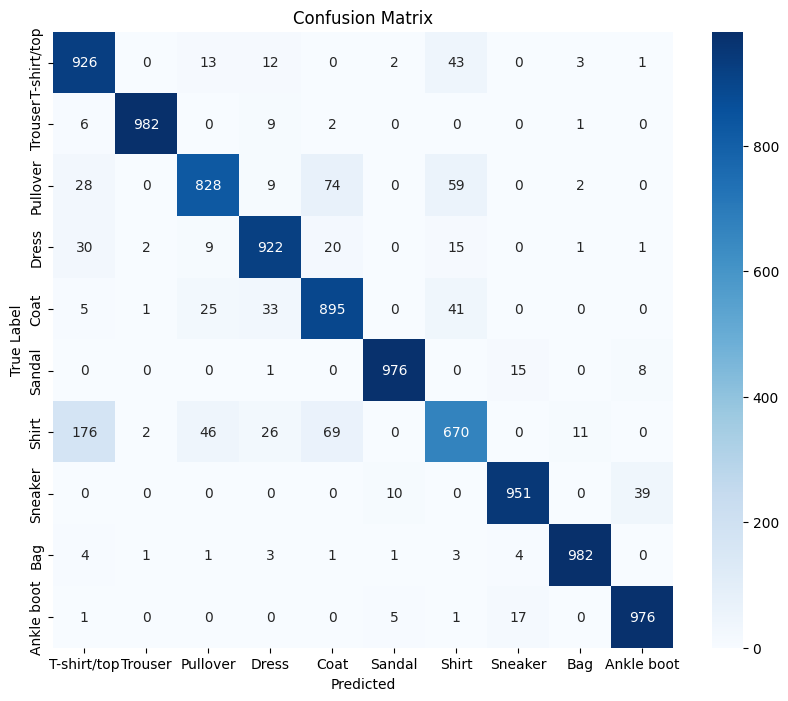

Classification Report:

              precision    recall  f1-score   support

 T-shirt/top       0.79      0.93      0.85      1000
     Trouser       0.99      0.98      0.99      1000
    Pullover       0.90      0.83      0.86      1000
       Dress       0.91      0.92      0.92      1000
        Coat       0.84      0.90      0.87      1000
      Sandal       0.98      0.98      0.98      1000
       Shirt       0.81      0.67      0.73      1000
     Sneaker       0.96      0.95      0.96      1000
         Bag       0.98      0.98      0.98      1000
  Ankle boot       0.95      0.98      0.96      1000

    accuracy                           0.91     10000
   macro avg       0.91      0.91      0.91     10000
weighted avg       0.91      0.91      0.91     10000



In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import fashion_mnist
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

## 📊 2. Load and Preprocess the Datase

# Load dataset
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

# Normalize pixel values
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape for CNN input
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

# Class labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 🧱 3. Build the CNN Model

model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()

## 🏋️ 4. Train the Model

history = model.fit(x_train, y_train, epochs=10,
                    validation_data=(x_test, y_test))

## 📈 5. Visualize Accuracy and Loss

plt.figure(figsize=(12, 4))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()

## 🧪 6. Evaluate on Test Data

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(f"Test Accuracy: {test_acc:.4f}")

## 🔍 7. Confusion Matrix & Classification Repor

from sklearn.metrics import confusion_matrix, classification_report

y_pred = np.argmax(model.predict(x_test), axis=-1)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred, target_names=class_names))

### ✅ Conclusion

This notebook successfully demonstrates:
- Image classification using a Convolutional Neural Network (CNN)
- TensorFlow and Keras for deep learning model development
- Data preprocessing and normalization for image input
- Model training and validation
- Performance evaluation using accuracy, loss curves, and predictions
